In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk
#nltk.download('vader_lexicon')

### Data Understanding

In [2]:
df = pd.read_csv('reddit_opinion_republican.csv', skipinitialspace=True)
pd.set_option('display.max_columns', None)

In [3]:
df.dtypes

comment_id                     object
score                           int64
self_text                      object
subreddit                      object
created_time                   object
post_id                        object
author_name                    object
controversiality                int64
ups                             int64
downs                           int64
user_is_verified                 bool
user_account_created_time      object
user_awardee_karma            float64
user_awarder_karma            float64
user_link_karma               float64
user_comment_karma            float64
user_total_karma              float64
post_score                      int64
post_self_text                 object
post_title                     object
post_upvote_ratio             float64
post_thumbs_ups                 int64
post_total_awards_received      int64
post_created_time              object
dtype: object

In [4]:
df.tail()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
932186,dn4w23l,2,Good bot,ConservativeDemocrat,2017-09-17 18:54:07,70l48o,[deleted],0,2,0,False,NaN,0.0,0.0,0.0,0.0,0.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
932187,dn4guol,3,The top level post has been removed.,ConservativeDemocrat,2017-09-17 13:42:04,70l48o,DuplicatesBot,0,3,0,True,2017-09-06 19:54:18,0.0,60.0,32.0,17615.0,17707.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
932188,dn4ewd5,1,delete,ConservativeDemocrat,2017-09-17 12:43:05,70l48o,Autarch_Severian,0,1,0,True,2015-04-25 15:19:54,0.0,0.0,4035.0,9094.0,13129.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
932189,dn4dwix,2,*Third Way had an article*\n\n*on all the time...,ConservativeDemocrat,2017-09-17 12:11:31,70l48o,I_am_a_haiku_bot,0,2,0,False,NaN,0.0,0.0,0.0,0.0,0.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34
932190,dn4dvry,8,Third Way had an article on all the times we w...,ConservativeDemocrat,2017-09-17 12:10:57,70l48o,cyberklown28,0,8,0,True,2013-05-18 01:50:32,382.0,40.0,55209.0,126596.0,182227.0,13,NaN,Trump and Schumer Wrong on Trade,1.0,13,0,2017-09-17 02:44:34


In [5]:
df.describe()

,score,controversiality,ups,downs,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_upvote_ratio,post_thumbs_ups,post_total_awards_received
count,932191.000000,932191.000000,932191.000000,932191.0,932163.000000,932163.000000,9.321630e+05,9.321630e+05,9.321630e+05,932191.000000,932191.000000,932191.000000,932191.0
mean,26.073668,0.036561,26.073668,0.0,1000.769727,377.529894,2.435527e+04,9.885573e+04,1.245893e+05,3217.179082,0.872197,3217.179082,0.0
std,164.669262,0.187682,164.669262,0.0,4424.194653,2696.907138,2.519191e+05,1.950202e+05,3.497477e+05,5442.999333,0.182545,5442.999333,0.0
min,-785.000000,0.000000,-785.000000,0.0,0.000000,0.000000,0.000000e+00,-1.000000e+02,-9.900000e+01,0.000000,0.030000,0.000000,0.0
25%,1.000000,0.000000,1.000000,0.0,10.000000,0.000000,3.600000e+01,8.027000e+03,9.340000e+03,168.000000,0.870000,168.000000,0.0
50%,4.000000,0.000000,4.000000,0.0,181.000000,0.000000,6.580000e+02,3.231800e+04,3.736900e+04,1017.000000,0.950000,1017.000000,0.0
75%,14.000000,0.000000,14.000000,0.0,709.000000,86.000000,5.170000e+03,1.037320e+05,1.192960e+05,3923.000000,0.970000,3923.000000,0.0
max,14830.000000,1.000000,14830.000000,0.0,634187.000000,655609.000000,1.468386e+07,3.854791e+06,1.565839e+07,67653.000000,1.000000,67653.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932191 entries, 0 to 932190
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   comment_id                  932191 non-null  object 
 1   score                       932191 non-null  int64  
 2   self_text                   932181 non-null  object 
 3   subreddit                   932191 non-null  object 
 4   created_time                932191 non-null  object 
 5   post_id                     932191 non-null  object 
 6   author_name                 932191 non-null  object 
 7   controversiality            932191 non-null  int64  
 8   ups                         932191 non-null  int64  
 9   downs                       932191 non-null  int64  
 10  user_is_verified            932191 non-null  bool   
 11  user_account_created_time   917017 non-null  object 
 12  user_awardee_karma          932163 non-null  float64
 13  user_awarder_k

In [7]:
# Transform the data type of 'col1' from object to string
df['self_text'] = df['self_text'].astype(str)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932191 entries, 0 to 932190
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   comment_id                  932191 non-null  object 
 1   score                       932191 non-null  int64  
 2   self_text                   932191 non-null  object 
 3   subreddit                   932191 non-null  object 
 4   created_time                932191 non-null  object 
 5   post_id                     932191 non-null  object 
 6   author_name                 932191 non-null  object 
 7   controversiality            932191 non-null  int64  
 8   ups                         932191 non-null  int64  
 9   downs                       932191 non-null  int64  
 10  user_is_verified            932191 non-null  bool   
 11  user_account_created_time   917017 non-null  object 
 12  user_awardee_karma          932163 non-null  float64
 13  user_awarder_k

In [9]:
df.shape

(932191, 24)

In [10]:
count_delete = df[df['self_text'] == 'delete']
count_delete

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
291557,ki5ir5l,9,delete,conspiracy,2024-01-16 17:46:13,1988uhg,Ae119952,0,9,0,True,2022-07-31 03:29:49,0.0,0.0,1.0,20.0,21.0,0,If Russia wants to cause the most damage withi...,If Russia wants to cause the most damage withi...,0.27,0,0,2024-01-16 17:43:49
932188,dn4ewd5,1,delete,ConservativeDemocrat,2017-09-17 12:43:05,70l48o,Autarch_Severian,0,1,0,True,2015-04-25 15:19:54,0.0,0.0,4035.0,9094.0,13129.0,13,NaN,Trump and Schumer Wrong on Trade,1.00,13,0,2017-09-17 02:44:34


In [11]:
count_delete = df[df['author_name'] == 'deleted']
count_delete

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time


In [12]:
df = df[df['self_text'] != 'delete']
df.shape

(932189, 24)

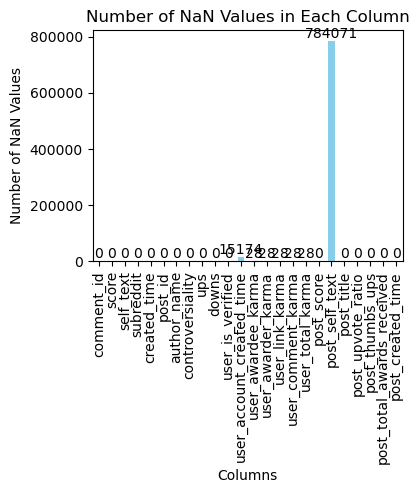

In [13]:
# Calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# Create a bar chart
nan_counts.plot(kind='bar', figsize=(4, 3), color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

for i, value in enumerate(nan_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

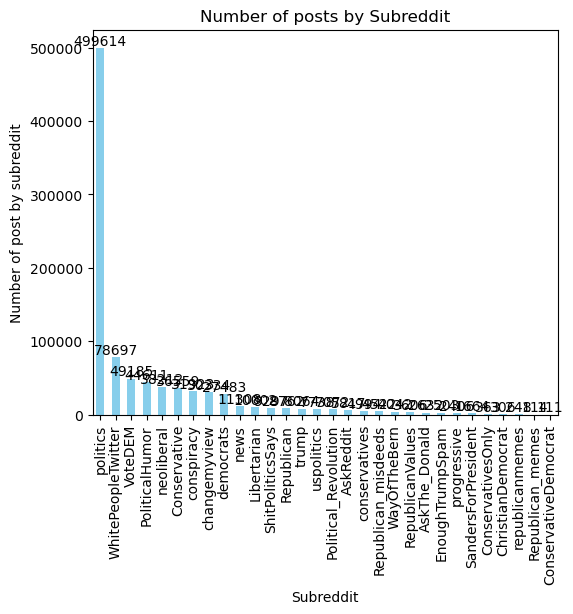

In [14]:
sub_counts = df['subreddit'].value_counts()

plt.figure(figsize=(6, 5))
sub_counts.plot(kind='bar', color='skyblue')
plt.title('Number of posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of post by subreddit')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for i, value in enumerate(sub_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

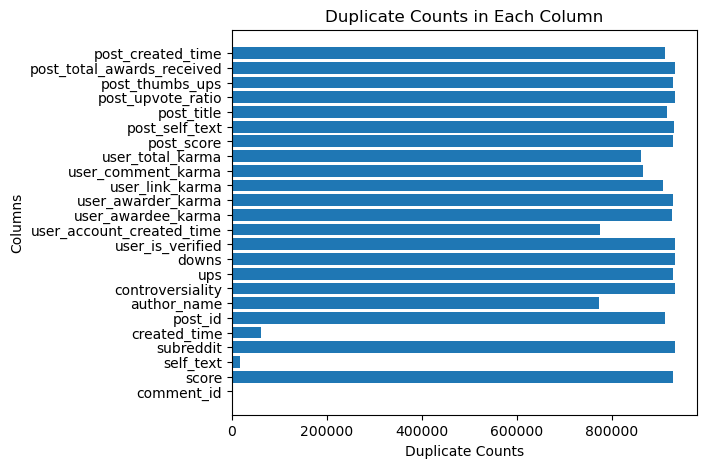

In [15]:
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Plotting
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Plotting
plt.figure(figsize=(6, 5))
plt.barh(duplicate_counts.index, duplicate_counts.values)
plt.ylabel('Columns')
plt.xlabel('Duplicate Counts')
plt.title('Duplicate Counts in Each Column')
plt.show()

In [16]:
df['date'] = pd.to_datetime(df['created_time'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

df.shape

(932189, 26)

In [17]:
# Extract month from the 'date' column
df['month'] = df['date'].dt.month

df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,date,year,month
0,kptxrp0,1,Now Trump is mocking Haley's husband because.....,neoliberal,2024-02-10 20:51:38,1anaf6q,secretlives,0,1,0,True,2011-11-15 00:21:51,2493.0,4417.0,28746.0,338996.0,374652.0,0,The [discussion thread](https://neoliber.al/dt...,Discussion Thread,0.41,0,0,2024-02-10 07:00:12,2024-02-10 20:51:38,2024,2
1,kptxrb5,1,"nice, but my comment is that he has not been r...",conspiracy,2024-02-10 20:51:33,1an14f7,FlipBikeTravis,0,1,0,True,2012-12-30 17:40:57,0.0,0.0,1.0,5198.0,5199.0,304,The Special Counsel claims Biden is to incompe...,You can’t have it both ways,0.71,304,0,2024-02-09 22:53:25,2024-02-10 20:51:33,2024,2
2,kptxqaq,1,Could November be a bellwether for Tuesday’s e...,VoteDEM,2024-02-10 20:51:24,1andv5h,xXThKillerXx,0,1,0,True,2012-08-13 15:06:24,462.0,0.0,5774.0,54429.0,60665.0,27,**We are looking for new mods!** Join our tea...,"Daily Discussion Thread: February 10, 2024",0.93,27,0,2024-02-10 11:00:04,2024-02-10 20:51:24,2024,2
3,kptxpi5,1,We really don't,neoliberal,2024-02-10 20:51:15,1anaf6q,NoStatistician5355,0,1,0,True,2023-10-22 12:06:34,0.0,0.0,105.0,2592.0,2697.0,0,The [discussion thread](https://neoliber.al/dt...,Discussion Thread,0.41,0,0,2024-02-10 07:00:12,2024-02-10 20:51:15,2024,2
4,kptxpbf,1,"And what makes you certain this is racism, and...",changemyview,2024-02-10 20:51:13,1anjkzy,tolkienfan2759,0,1,0,True,2022-11-04 15:17:19,139.0,12.0,1192.0,23428.0,24771.0,0,Definition: Racism in America is a silent war...,CMV: the post text has a better definition of ...,0.18,0,0,2024-02-10 16:04:21,2024-02-10 20:51:13,2024,2


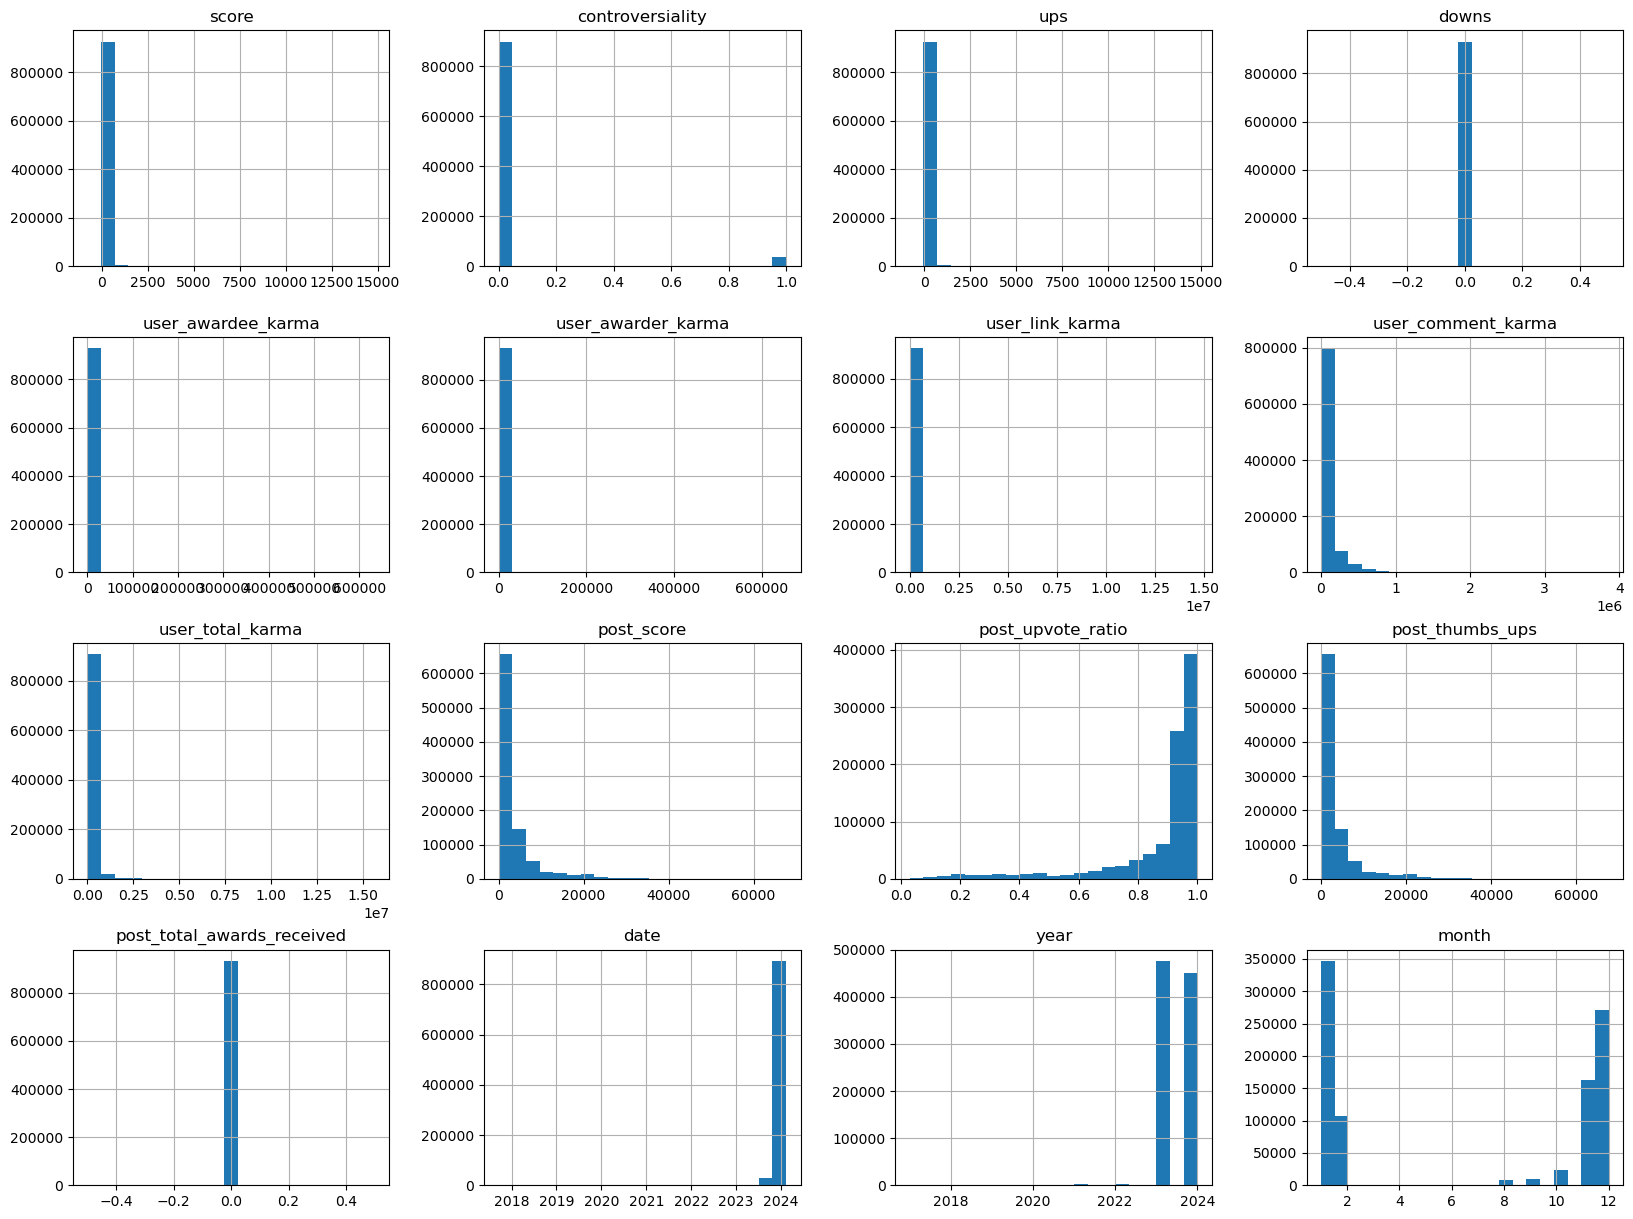

In [18]:
import math

df.hist(figsize=(20,15), bins=round(math.log2(len(df))+1)) # Sturges' rule
plt.show()


In [19]:
sub_counts

politics                499614
WhitePeopleTwitter       78697
VoteDEM                  49185
PoliticalHumor           44611
neoliberal               38212
Conservative             36559
conspiracy               31923
changemyview             30334
democrats                27483
news                     11308
Libertarian              10002
ShitPoliticsSays          9297
Republican                8762
trump                     8064
uspolitics                7738
Political_Revolution      7072
AskReddit                 5817
conservatives             4994
Republican_misdeeds       4522
WayOfTheBern              4042
RepublicanValues          3606
AskThe_Donald             2632
EnoughTrumpSpam           2503
progressive               2406
SandersForPresident       1664
ConservativesOnly          363
ChristianDemocrat          306
republicanmemes            248
Republican_memes           114
ConservativeDemocrat       111
Name: subreddit, dtype: int64

### Data preparation

#### Dimensionality reduction

In [20]:
# dimensionality reduction

columns_to_drop = ['post_self_text','comment_id','author_name','post_id','downs','user_account_created_time','user_is_verified','user_awardee_karma','user_awarder_karma','user_link_karma','user_total_karma','post_total_awards_received','user_comment_karma','post_thumbs_ups','post_created_time','controversiality','created_time']

df = df.drop(columns = columns_to_drop)

df.head()

,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month
0,1,Now Trump is mocking Haley's husband because.....,neoliberal,1,0,Discussion Thread,0.41,2024-02-10 20:51:38,2024,2
1,1,"nice, but my comment is that he has not been r...",conspiracy,1,304,You can’t have it both ways,0.71,2024-02-10 20:51:33,2024,2
2,1,Could November be a bellwether for Tuesday’s e...,VoteDEM,1,27,"Daily Discussion Thread: February 10, 2024",0.93,2024-02-10 20:51:24,2024,2
3,1,We really don't,neoliberal,1,0,Discussion Thread,0.41,2024-02-10 20:51:15,2024,2
4,1,"And what makes you certain this is racism, and...",changemyview,1,0,CMV: the post text has a better definition of ...,0.18,2024-02-10 20:51:13,2024,2


In [21]:
df.shape

(932189, 10)

In [22]:
df_2023 = df[df['year'] == 2023]
df_2023.shape

(476249, 10)

In [23]:
df_2022 = df[df['year'] == 2022]
df_2022.shape

(1796, 10)

In [24]:
df_2021 = df[df['year'] == 2021]
df_2021.shape

(2055, 10)

In [25]:
df_2020 = df[df['year'] == 2020]
df_2020.shape

(742, 10)

In [26]:
df = df[df['year'] > 2022]

#### Dropping NaN values in self_text

In [27]:
df = df.dropna(subset=['self_text'])

In [28]:
df.shape

(927485, 10)

#### Remapping titles into numerical labels

In [29]:
# Create a mapping dictionary to map class labels to numbers
label_mapping = {label: idx for idx, label in enumerate(df['post_title'].unique())}

# Create a new column 'numerical_label' with the numerical representation of class labels
df['numerical_label'] = df['post_title'].map(label_mapping)

df.tail()

,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
927481,12,I honestly believe everyone instinctual knows ...,SandersForPresident,12,1089,"On Tax Avoidance, Says Bernie Sanders, 'Trump ...",1.0,2023-01-01 12:38:20,2023,1,16591
927482,1,Not getting enough attention at home?,republicanmemes,1,0,"This is statistically true, 80% of congression...",0.4,2023-01-01 05:24:40,2023,1,16592
927483,41,"Well, there's another no-brainer",SandersForPresident,41,1089,"On Tax Avoidance, Says Bernie Sanders, 'Trump ...",1.0,2023-01-01 02:07:17,2023,1,16591
927484,2,Do we have a list of all people of all politic...,progressive,2,219,Yet Another Republican Commits Voter Fraud - J...,1.0,2023-01-01 01:05:18,2023,1,16588
927485,3,you know that list is gonna be a whole bunch o...,progressive,3,219,Yet Another Republican Commits Voter Fraud - J...,1.0,2023-01-01 00:57:14,2023,1,16588


#### post_self counts 

In [30]:
df['numerical_label'].value_counts()

### classes are definitely imbalanced


6601     767
0        761
6152     572
8870     554
3623     545
        ... 
3209       1
3207       1
3187       1
3173       1
16592      1
Name: numerical_label, Length: 16593, dtype: int64

In [31]:
#!pip install textblob
from textblob import TextBlob
from tqdm.notebook import tqdm
from nltk.corpus import stopwords

In [32]:
#L = df.iloc[1]['self_text']

In [33]:
#TextBlob_results[0] = TextBlob(L)

In [34]:
#TextBlob_results[0].sentiment
polarity_score = []
subjectivity_score = []

for i in tqdm(range(0,  df.shape[0]) ):
    score = TextBlob(df.iloc[i]['self_text'])
    polarity = score.sentiment[0]
    subjectivity = score.sentiment[1]
    polarity_score.append(polarity)
    subjectivity_score.append(subjectivity)




  0%|          | 0/927485 [00:00<?, ?it/s]

In [35]:
df.shape

(927485, 11)

In [36]:
df = pd.concat([df, pd.Series(polarity_score)] , axis= 1)
df = pd.concat([df, pd.Series(subjectivity_score)] , axis= 1)
df.head()

,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label,0,0
0,1.0,Now Trump is mocking Haley's husband because.....,neoliberal,1.0,0.0,Discussion Thread,0.41,2024-02-10 20:51:38,2024.0,2.0,0.0,0.000000,0.000000
1,1.0,"nice, but my comment is that he has not been r...",conspiracy,1.0,304.0,You can’t have it both ways,0.71,2024-02-10 20:51:33,2024.0,2.0,1.0,0.030556,0.407870
2,1.0,Could November be a bellwether for Tuesday’s e...,VoteDEM,1.0,27.0,"Daily Discussion Thread: February 10, 2024",0.93,2024-02-10 20:51:24,2024.0,2.0,2.0,0.000000,0.000000
3,1.0,We really don't,neoliberal,1.0,0.0,Discussion Thread,0.41,2024-02-10 20:51:15,2024.0,2.0,0.0,0.200000,0.200000
4,1.0,"And what makes you certain this is racism, and...",changemyview,1.0,0.0,CMV: the post text has a better definition of ...,0.18,2024-02-10 20:51:13,2024.0,2.0,3.0,-0.024554,0.439732


In [37]:
df.shape

(927486, 13)

In [38]:
df.columns = list(df.columns[:-2]) + ['TB_Polarity', 'TB_Subjectivity']

In [39]:
cols = df.columns.tolist()
cols = ['TB_Polarity', 'TB_Subjectivity'] + [col for col in cols if col not in ['TB_Polarity', 'TB_Subjectivity']]
df = df[cols]

In [40]:
df['TB_Sub_label'] = df['TB_Subjectivity'].apply(lambda x: 'sub' if x > 0.33 else 'obj')

In [41]:
cols = list(df.columns)  # Get the list of column names
last_col = cols[-1]      # Get the name of the last column
cols = [last_col] + cols[:-1]  # Move the last column to the beginning
df = df[cols] 

In [42]:
df['TB_Pol_label'] = df['TB_Polarity'].apply(lambda x: 'pos' if x > 0 else ('neu' if x == 0 else 'neg'))

In [43]:
cols = list(df.columns)  # Get the list of column names
last_col = cols[-1]      # Get the name of the last columnz
cols = [last_col] + cols[:-1]  # Move the last column to the beginning
df = df[cols] 

In [44]:
df.head()

,TB_Pol_label,TB_Sub_label,TB_Polarity,TB_Subjectivity,score,self_text,subreddit,ups,post_score,post_title,post_upvote_ratio,date,year,month,numerical_label
0,neu,obj,0.000000,0.000000,1.0,Now Trump is mocking Haley's husband because.....,neoliberal,1.0,0.0,Discussion Thread,0.41,2024-02-10 20:51:38,2024.0,2.0,0.0
1,pos,sub,0.030556,0.407870,1.0,"nice, but my comment is that he has not been r...",conspiracy,1.0,304.0,You can’t have it both ways,0.71,2024-02-10 20:51:33,2024.0,2.0,1.0
2,neu,obj,0.000000,0.000000,1.0,Could November be a bellwether for Tuesday’s e...,VoteDEM,1.0,27.0,"Daily Discussion Thread: February 10, 2024",0.93,2024-02-10 20:51:24,2024.0,2.0,2.0
3,pos,obj,0.200000,0.200000,1.0,We really don't,neoliberal,1.0,0.0,Discussion Thread,0.41,2024-02-10 20:51:15,2024.0,2.0,0.0
4,neg,sub,-0.024554,0.439732,1.0,"And what makes you certain this is racism, and...",changemyview,1.0,0.0,CMV: the post text has a better definition of ...,0.18,2024-02-10 20:51:13,2024.0,2.0,3.0
